<a href="https://colab.research.google.com/github/Yolantele/ML-data-clasifier/blob/master/tabular_neural_net_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Model For Waste Data Classification


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.
df - data_frame

In [0]:
# mount to google drive and load files
from google.colab import drive
drive.mount('/content/drive')


In [0]:
# path to data 
path = '/content/drive/My Drive/data/'

In [37]:
# load train data frame
# todo: 1. iterate through nl data and export only with material, eural code fields
#  then translate to en. this will increase train and test data sets and include missing material categories that appear in validation set
train_file = '/enMaterialData.csv'
df = pd.read_csv(path + train_file)



# load test data frame with material field empty
test_df = pd.read_csv(path + '/enWithoutMaterialData.csv')

df.head()

,reason,origin,color,state,size,consistency,otherCode,material4,material3,material2,material,mType,composite2,composite1,cType,indirectProduct,directProduct,pType,mixedOrPure,cleanOrDirty,euralDescription,euralCode,description,/0
0,NaN,NaN,NaN,NaN,NaN,slurry,NaN,NaN,NaN,oil,organic material,Soy,NaN,dry,NaN,dry,NaN,NaN,1.0,NaN,material unsuitable for consumption or processing,20304,Soyadroes technically,NaN
1,NaN,NaN,NaN,NaN,NaN,vast,NaN,NaN,NaN,NaN,wood,branches,NaN,NaN,NaN,wood,NaN,NaN,0.0,NaN,waste from forestry,20107,Branches,NaN
2,NaN,NaN,NaN,NaN,NaN,vast,NaN,NaN,NaN,NaN,cocoa,caps,NaN,NaN,NaN,cocoa,NaN,NaN,0.0,NaN,material unsuitable for consumption or processing,20304,Cocoa shells,NaN
3,NaN,NaN,NaN,debris,NaN,vast,NaN,NaN,NaN,NaN,sand,NaN,NaN,debris,NaN,debris,NaN,NaN,1.0,1.0,"mixtures of concrete, stones, tiles or ceramic...",170107,Debris with Sand,NaN
4,NaN,NaN,NaN,NaN,NaN,vast,NaN,NaN,NaN,NaN,organic material,Soy,NaN,NaN,NaN,organic material,NaN,NaN,0.0,NaN,material unsuitable for consumption or processing,20304,soya,NaN


#cats and conts 

**categorical variables - cat_names:**

what you're using to make predictions with.  (description, euralDescription, composite1, mType).
for categorical variables - will use Embeddings 

**continuos variables - cont_names:**

any catgeory that has limited number of possible (integer) choises: true/false ; fields such as cleanOrContaminated or mixedOrPure
continuos varibale names - they are sent to Neural net as pixels 

**uses processor - procs:**

a number of processes that deal with data in some ways: FillMissing, Categorify, Normalize both train and test dtata sets

In [0]:
# dependable variable field:
dep_var = 'material'
 
cat_names = ['euralDescription', 'description',] # limited categorical variables 
cont_names = ['euralCode'] # limited option numeric or true/false values sent to NN as 'pixels'
cont_names = []
# processors:
procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[400:2100].copy(), path=path + train_file, cat_names=cat_names, cont_names=cont_names)

Next:
data block api
add labels - tell which cols - column it is 

and get back data bunch
split train and test data ranges 800,1000


In [40]:
data = (TabularList.from_df(df, path=path+ train_file, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(1600,2000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
glycerine, lavaliet, kraftkarton, magnesium
  if getattr(ds, 'warn', False): warn(ds.warn)


In [41]:
data.show_batch(rows=10)

euralDescription,description,target
soil and stones not covered by 17 05 03,Class A BBK industry,ground
soil and stones not covered by 17 05 03,Roof gravel (Lelystad),grind
vegetable tissue waste,IOP / Zaden / Mil.Expr.-Monsanto,organic material
soil and stones not covered by 17 05 03,contaminated ground,ground
biodegradable waste,Roadside grass / hay,bold
soil and stones not covered by 17 05 03,Ground AW,ground
concrete,"Pure debris / cement, not route",cement
building material containing asbestos,selectively removed asbestos (GA),asbestos
material unsuitable for consumption or processing,vegetable fat separator,know
soil and stones not covered by 17 05 03,Land Coenraad Botstraat 44 Den Helder,ground


In [42]:
print(len(data.classes), 'categories for material --->', data.classes, )

97 categories for material ---> ['AVI-bodemas', 'Cork', 'EPS', 'Glass', 'HDPE', 'LDPE', 'ON', 'PA', 'PC', 'PCFIC', 'PET', 'PFOS', 'PMMA', 'POM', 'PP', 'PS', 'PVC', 'Perlite', 'RIGHT NOW', 'RVS', 'SECTION', 'Soy', 'UP', 'activated carbon', 'aluminum', 'asbestos', 'beer', 'believe', 'bentonite', 'beryllium', 'bitumen', 'bold', 'bread', 'carton', 'cast', 'cement', 'ceramic', 'ceramic material', 'cocoa', 'collect', 'compost', 'dill', 'dough', 'eps', 'fatty acids', 'flint', 'fly ash', 'foam rubber', 'glass wool', 'grind', 'ground', 'insulation material', 'iron', 'know', 'kwik', 'lime', 'lithium', 'melamine', 'messing', 'metal', 'minerals', 'molasses', 'most', 'nickel', 'non-iron', 'nylon', 'oil', 'optical fiber', 'organic material', 'paper', 'plastic', 'polyester', 'porcelain', 'pvc', 'resin', 'rock wool', 'rubber', 'rvs', 'sand', 'sintels', 'snail wool', 'snails', 'solvents', 'starch', 'steel', 'stones', 'stories', 'sugar', 'syrup', 'teer', 'turf', 'tyleen', 'water', 'wine', 'wood', 'zeoli

In [43]:
print(data)

TabularDataBunch;

Train: LabelList (1720 items)
x: TabularList
euralDescription material unsuitable for consumption or processing; description Soyadroes technically; ,euralDescription waste from forestry; description Branches; ,euralDescription material unsuitable for consumption or processing; description Cocoa shells; ,euralDescription mixtures of concrete, stones, tiles or ceramic products other than those mentioned in 17 01 06; description Debris with Sand; ,euralDescription material unsuitable for consumption or processing; description soya; 
y: CategoryList
organic material,wood,cocoa,sand,organic material
Path: /content/drive/My Drive/data/enMaterialData.csv;

Valid: LabelList (396 items)
x: TabularList
euralDescription plastics; description #na#; ,euralDescription plastics; description #na#; ,euralDescription material unsuitable for consumption or processing; description #na#; ,euralDescription biodegradable waste; description #na#; ,euralDescription plastics; description #na#

pass in data to tabular learner:


In [0]:
learn = tabular_learner(data, layers=[200,400], metrics=accuracy)

In [65]:
learn.unfreeze()
learn.fit(3, 2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.026257,83.007812,0.666667,00:00
1,0.034799,42.670761,0.694444,00:00
2,0.047872,67.492050,0.704545,00:00


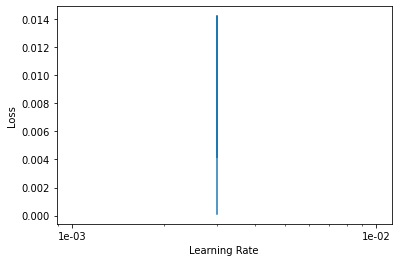

In [57]:
learn.recorder.plot()

In [66]:
# see into the model
# learn.model.eval()
learn.summary()


TabularModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [16]                 928        True      
______________________________________________________________________
Embedding            [100]                160,600    True      
______________________________________________________________________
Dropout              [116]                0          False     
______________________________________________________________________
Linear               [1300]               152,100    True      
______________________________________________________________________
ReLU                 [1300]               0          False     
______________________________________________________________________
BatchNorm1d          [1300]               2,600      True      
______________________________________________________________________
Linear               [800]                1,040,800  True      
_________________________________________________

In [0]:
learn.model_dir = '/content/drive/My Drive/data/models'
learn.save('material_classifier_model')

## Inference  
- run test data set to predict material
- extract the prediction confindece score  

In [85]:
row =777

# data_frame = df
data_frame = test_df

print('given material -->', data_frame.iloc[row].material)
print('description ---> ', data_frame.iloc[row].description, ', ', data_frame.iloc[row].euralDescription)
# print('description ---> ', data_frame.iloc[row].euralDescription)

given material --> nan
description --->  Multidruk ,  paper and cardboard


## Category Probability - Prediction Confidence score

In [86]:
#one_row = df.iloc[row]
one_row = test_df.iloc[row]

# pred_class,pred_idx,outputs = learn.predict(img)
# print(pred_class)
# print(list(zip(data.classes, map(lambda x: np.round(x * 100,1), outputs.detach().numpy())   )))

predicted_cat, total_cat, weights = learn.predict(one_row)


weights = dict(zip(data.classes, map(lambda x: np.round(x * 1,2), weights.detach().numpy() )   ))

weights = dict((k, v) for k, v in weights.items() if v)

print('predicted material ----> ', predicted_cat)
print('other potential material classes---', weights)

predicted material ---->  paper
other potential material classes--- {'paper': 1.0}
